In [27]:
"""
===============================================================
 Malaysia Labour Gender Trends Dashboard
 Author: Enoch Imoke
 Email: enokimoks@gmail.com
 Field: Library & Information Science | Data Analysis
 Description: 
     This analysis explores gender and sector-based employment
     trends in Malaysia (2001–2022) using Excel & Python (pandas,
     matplotlib, seaborn). Created as part of my LIS data analysis
     portfolio.
 ---------------------------------------------------------------
 Please credit if used.
===============================================================
"""

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
SIGNATURE = "Analysis by Enoch Imoke | enokimoks@gmail.com | 2025"

# Optional: make plots look cleaner
sns.set(style="whitegrid")

# Step 2: Load the Malaysia dataset
file_path = r"C:\Users\enoki\Documents\malaysia dataset.xlsx"
df = pd.read_excel(file_path)

# Step 3: Clean column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Preview the first few rows
df.head()


,date,sector,sex,proportion
0,2001-01-01,agriculture,both,15.1
1,2002-01-01,agriculture,both,14.9
2,2003-01-01,agriculture,both,14.3
3,2004-01-01,agriculture,both,14.6
4,2005-01-01,agriculture,both,14.6


In [23]:
# Step 4: Convert proportion column to numeric
df['proportion'] = pd.to_numeric(df['proportion'], errors='coerce')

# Step 5: Fix proportion if above 100% (means data had an extra zero)
df.loc[df['proportion'] > 100, 'proportion'] = df['proportion'] / 10

# Step 6: Extract year and keep useful columns
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
df = df[['year', 'sector', 'sex', 'proportion']]

# Check cleaned data
df.head()


,year,sector,sex,proportion
0,2001,agriculture,both,15.1
1,2002,agriculture,both,14.9
2,2003,agriculture,both,14.3
3,2004,agriculture,both,14.6
4,2005,agriculture,both,14.6


In [24]:
# Step 7: Create a pivot table for analysis
pivot = df.pivot_table(
    index=['year', 'sector'],
    columns='sex',
    values='proportion',
    aggfunc='mean'
).reset_index()

pivot.head()


sex,year,sector,both,female,male
0,2001,agriculture,15.1,12.0,16.8
1,2001,industry,33.1,29.7,35.0
2,2001,services,51.7,58.3,48.2
3,2002,agriculture,14.9,11.6,16.8
4,2002,industry,32.0,27.3,34.6


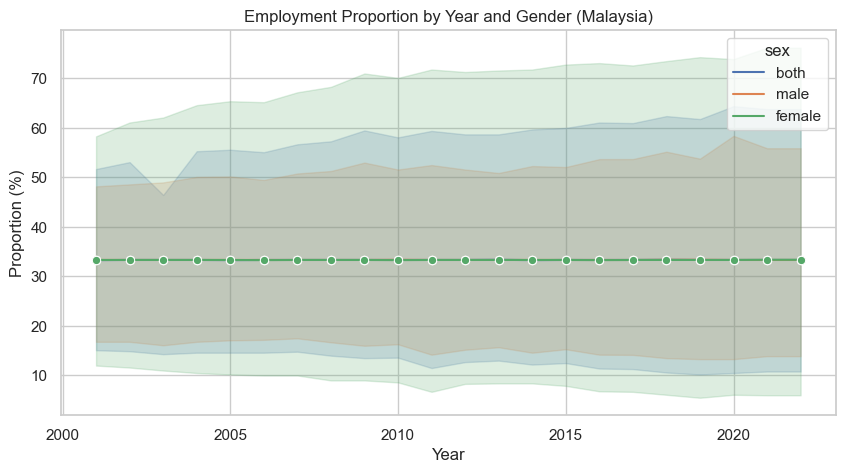

C:\Users\enoki\AppData\Local\Temp\ipykernel_14388\3401764553.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sector', y='proportion', hue='sex', ci=None)


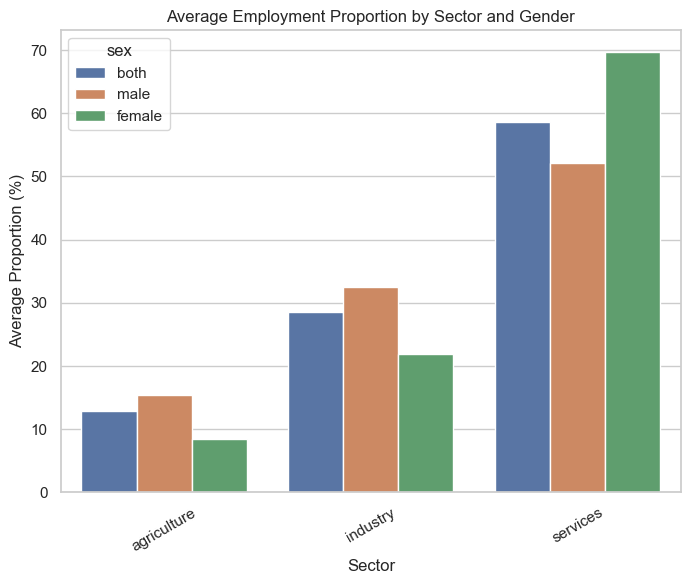

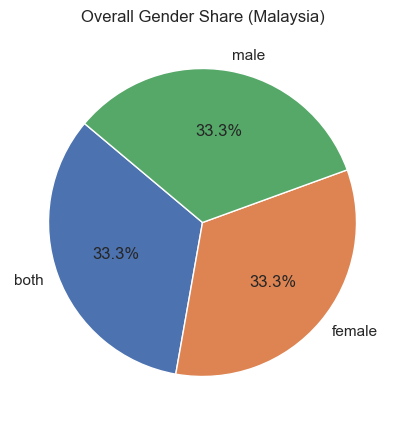

In [25]:
# Step 8: Line chart — yearly trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='proportion', hue='sex', marker='o')
plt.title("Employment Proportion by Year and Gender (Malaysia)")
plt.xlabel("Year")
plt.ylabel("Proportion (%)")
plt.grid(True)
plt.show()

# Step 9: Bar chart — average proportion by sector
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sector', y='proportion', hue='sex', ci=None)
plt.title("Average Employment Proportion by Sector and Gender")
plt.xlabel("Sector")
plt.ylabel("Average Proportion (%)")
plt.xticks(rotation=30)
plt.show()

# Step 10: Pie chart — total proportion by gender
gender_totals = df.groupby('sex')['proportion'].mean().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(
    gender_totals['proportion'],
    labels=gender_totals['sex'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Overall Gender Share (Malaysia)")
plt.show()


In [26]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "malaysia_gender_sector_dashboard.pdf"

with PdfPages(pdf_path) as pdf:
    # Metadata
    metadata = {
        'Title': 'Malaysia Labour Gender Trends Dashboard',
        'Author': 'Enoch Imoke',
        'Subject': 'Gender & Sector Employment Analysis (2001–2022)',
        'Keywords': 'Malaysia, Labour, Gender, Data Analysis, Enoch Imoke, LIS, Data Visualization',
        'Creator': 'Enoch Imoke | enokimoks@gmail.com'
    }

    # --- Chart 1: Line plot ---
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x='year', y='proportion', hue='sex', marker='o')
    plt.title("Employment Proportion by Year and Gender (Malaysia)")
    plt.xlabel("Year")
    plt.ylabel("Proportion (%)")
    plt.figtext(0.5, 0.01, "Analysis by Enoch Imoke | enokimoks@gmail.com", ha='center', fontsize=8, style='italic')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # --- Chart 2: Bar chart ---
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='sector', y='proportion', hue='sex', ci=None)
    plt.title("Average Employment Proportion by Sector and Gender")
    plt.xlabel("Sector")
    plt.ylabel("Average Proportion (%)")
    plt.xticks(rotation=30)
    plt.figtext(0.5, 0.01, "Analysis by Enoch Imoke | enokimoks@gmail.com", ha='center', fontsize=8, style='italic')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # --- Chart 3: Pie chart ---
    plt.figure(figsize=(5, 5))
    plt.pie(gender_totals['proportion'], labels=gender_totals['sex'], autopct='%1.1f%%', startangle=140)
    plt.title("Overall Gender Share (Malaysia)")
    plt.figtext(0.5, 0.01, "Analysis by Enoch Imoke | enokimoks@gmail.com", ha='center', fontsize=8, style='italic')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    pdf.infodict().update(metadata)

print(f"✅ Dashboard saved successfully as: {pdf_path}")


C:\Users\enoki\AppData\Local\Temp\ipykernel_14388\1680179233.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sector', y='proportion', hue='sex', ci=None)


✅ Dashboard saved successfully as: malaysia_gender_sector_dashboard.pdf
